In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from stats_tools import auto_stats
import matplotlib.pyplot as plt
from params import *
import ghibtools as gh

## PARAMS

In [3]:
ecg_interesting_metrics = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20', 'HRV_LF', 'HRV_HF', 'HRV_LFHF']
ppg_interesting_metrics = ['mean amplitude', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_pNN50', 'HRV_pNN20']
eda_interesting_metrics = ['nb_peaks', 'mean_height', 'EDA_Symp', 'EDA_SympN']

In [4]:
indexes = ['participant','quality','room']

In [5]:
outcomes = {
    'eeg':['Hz_30_80', 'Hz_13_30', 'Hz_8_13', 'Hz_4_8', 'Hz_1_4'],
    'ppg': ppg_interesting_metrics,
    'ecg': ecg_interesting_metrics,
    'eda': eda_interesting_metrics
}

In [6]:
predictor = 'room'
subject = 'participant'

In [7]:
savefig = True

## TOOLS

In [8]:
def load(biosig, filter_quality=True):
    df = pd.read_excel(f'../metrics/{biosig}_metrics.xlsx').drop(columns = 'Unnamed: 0')

    if filter_quality:
        if biosig == 'ecg':
            df_return = df[df['quality'] == 2]
        else:
            df_return = df[df['quality'] >= 1]
    else:
        df_return = df
        
    return df_return.dropna(axis = 'columns')

## GO

- Stastical interactions between metrics

In [9]:
all_metrics = pd.concat([load(biosig).set_index(indexes) for biosig in ['eeg','ecg','eda']], axis = 1)

<AxesSubplot:>

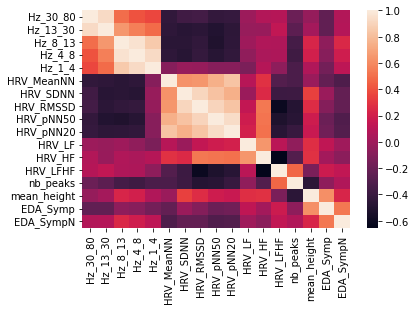

In [10]:
sns.heatmap(all_metrics.corr('spearman'))

In [11]:
all_metrics.rcorr('spearman')

,Hz_30_80,Hz_13_30,Hz_8_13,Hz_4_8,Hz_1_4,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_LFHF,nb_peaks,mean_height,EDA_Symp,EDA_SympN
Hz_30_80,-,***,***,***,***,*,,,*,*,,,,,,,
Hz_13_30,0.929,-,***,***,***,*,*,*,**,*,,,,,,,
Hz_8_13,0.49,0.65,-,***,***,*,*,*,**,*,,,,*,,,
Hz_4_8,0.402,0.554,0.96,-,***,*,*,*,*,*,,,,*,,,
Hz_1_4,0.362,0.489,0.857,0.925,-,,,,,,,,,*,,,
HRV_MeanNN,-0.439,-0.447,-0.47,-0.453,-0.095,-,***,***,***,***,,**,***,*,,,*
HRV_SDNN,-0.372,-0.474,-0.471,-0.48,-0.027,0.627,-,***,***,***,,**,***,**,*,,
HRV_RMSSD,-0.359,-0.463,-0.439,-0.422,-0.038,0.643,0.904,-,***,***,,***,***,***,,,
HRV_pNN50,-0.431,-0.502,-0.512,-0.48,-0.088,0.747,0.82,0.901,-,***,*,***,***,***,,,*
HRV_pNN20,-0.417,-0.456,-0.451,-0.438,-0.087,0.83,0.748,0.827,0.934,-,*,***,***,**,,,


Cerveau : 
- Delta & Theta vs Alpha vs Beta & Gamma

Coeur : 
- Time : RMSSD & SDNN & pNN50 = same ?
- Freq : LFHF anticorr avec time ? 


Cross :
- Beta & Gamma varient à l'inverse de la variabilité cardiaque
- LFHF corr à nb_peaks eda qui sont à l'inverse de variabilité cardiaque
- Gamma & EDA_Symp anticorr


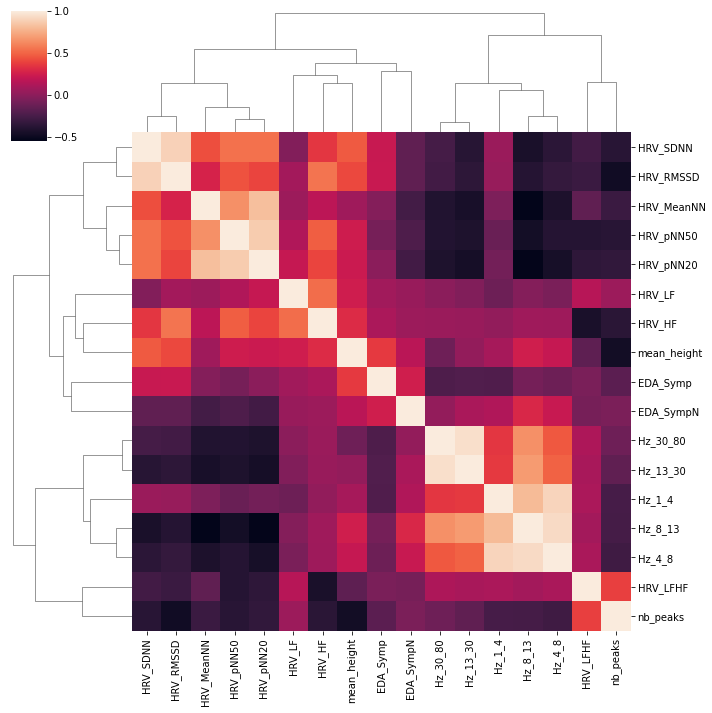

In [12]:
sns.clustermap(all_metrics.corr('pearson'))

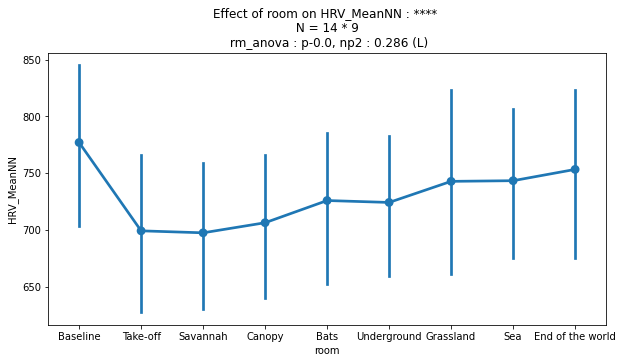

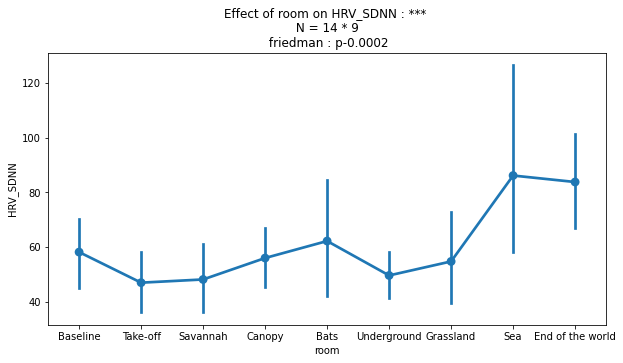

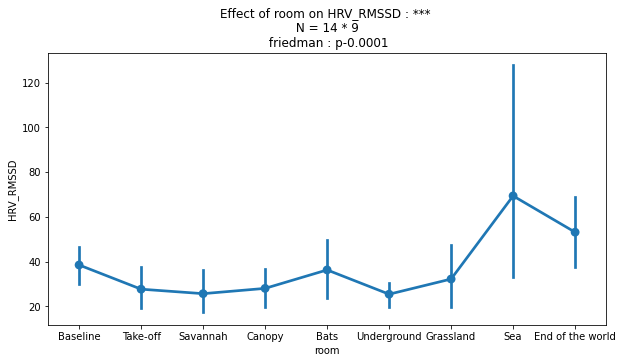

/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact 

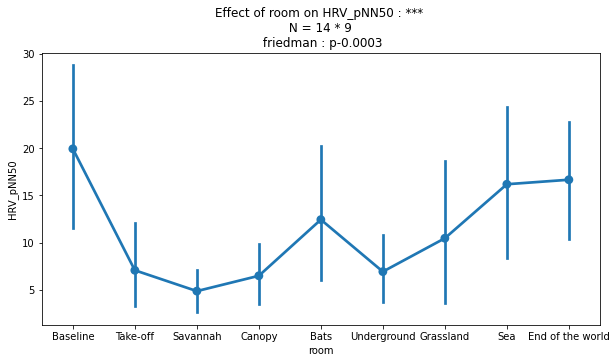

/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py38_cluster/lib64/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


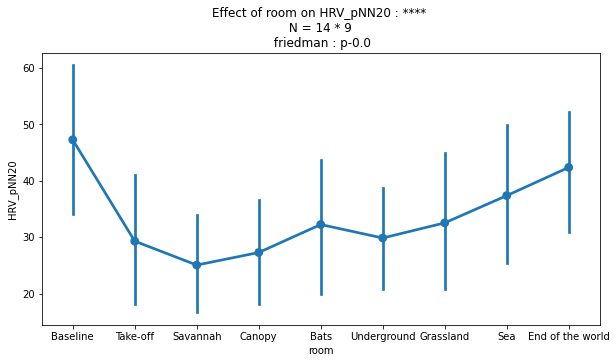

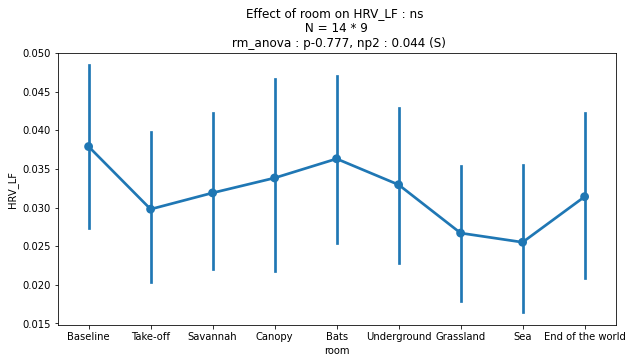

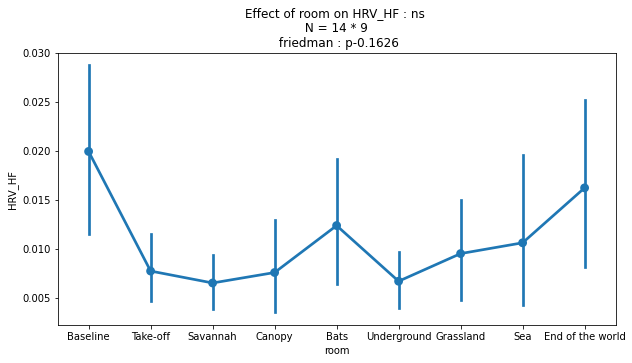

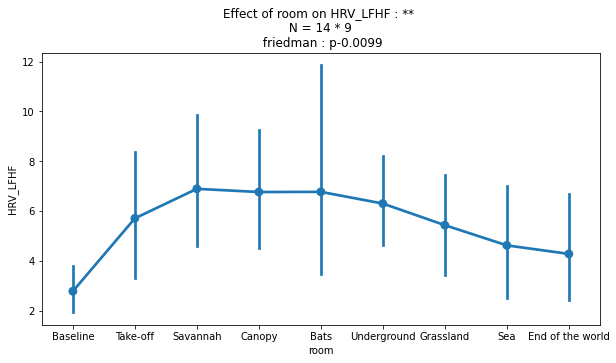

In [13]:
ecg_metrics = load('ecg')
for outcome in outcomes['ecg']:
    
    title = gh.auto_stats(df=ecg_metrics, predictor = 'room', outcome = outcome, subject = 'participant', transform = False).get_title()
    plt.close()
    
    fig, ax = plt.subplots(figsize = (10,5))
    sns.pointplot(x="room", y=outcome, data=ecg_metrics, ax=ax)
    ax.set_title(title)
    plt.show()

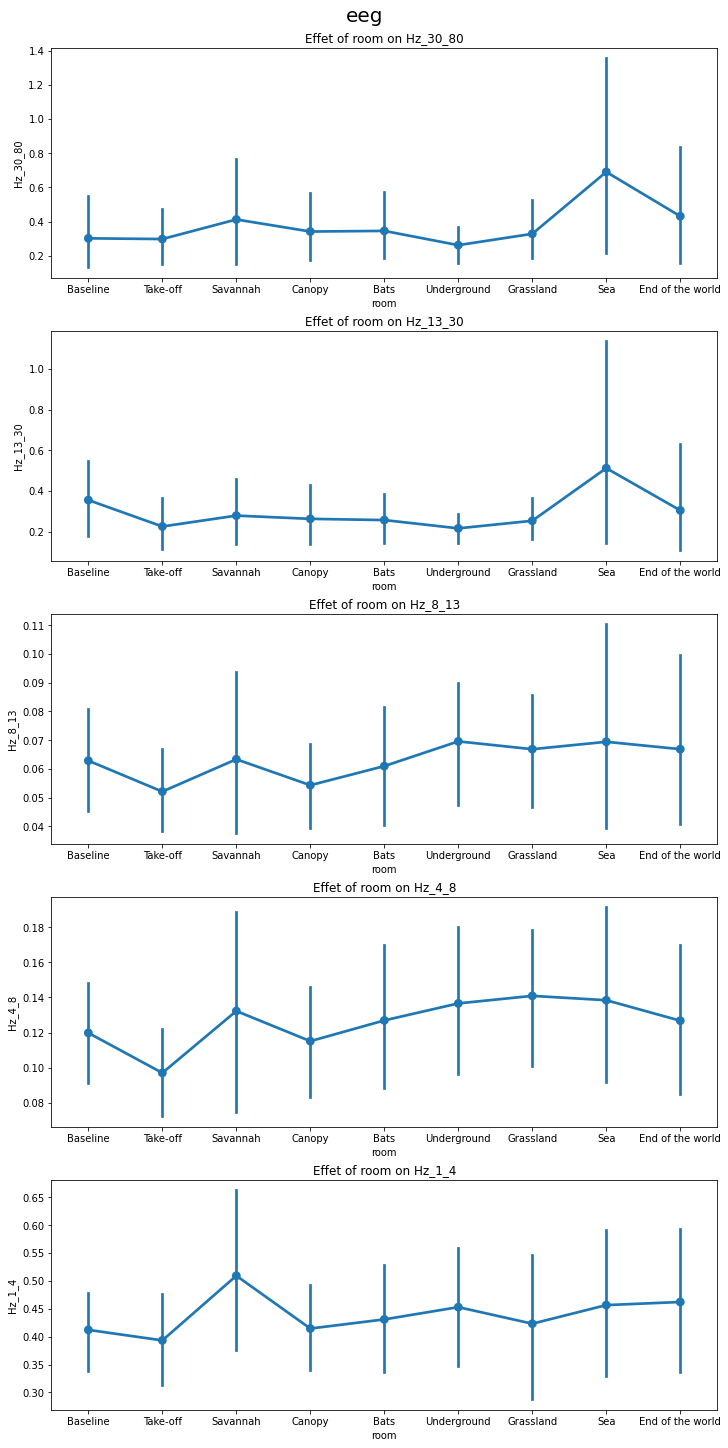

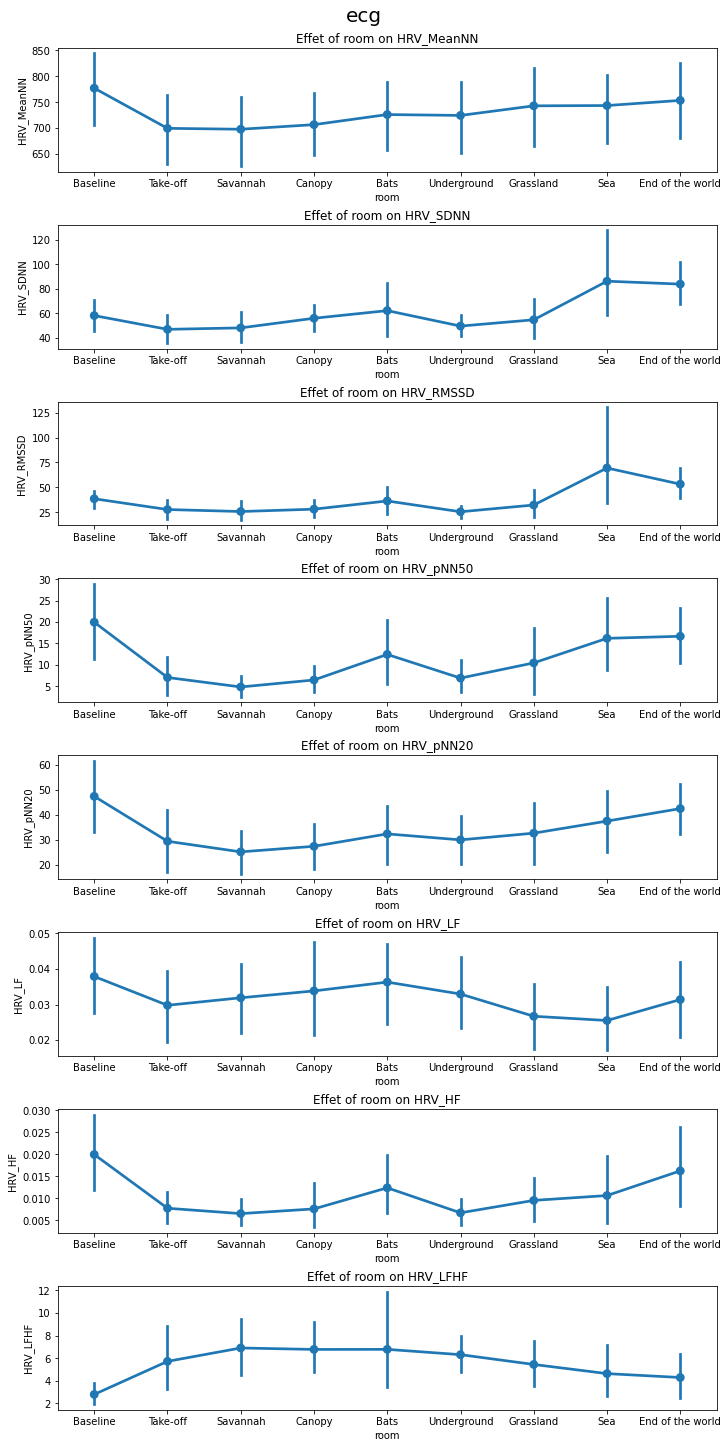

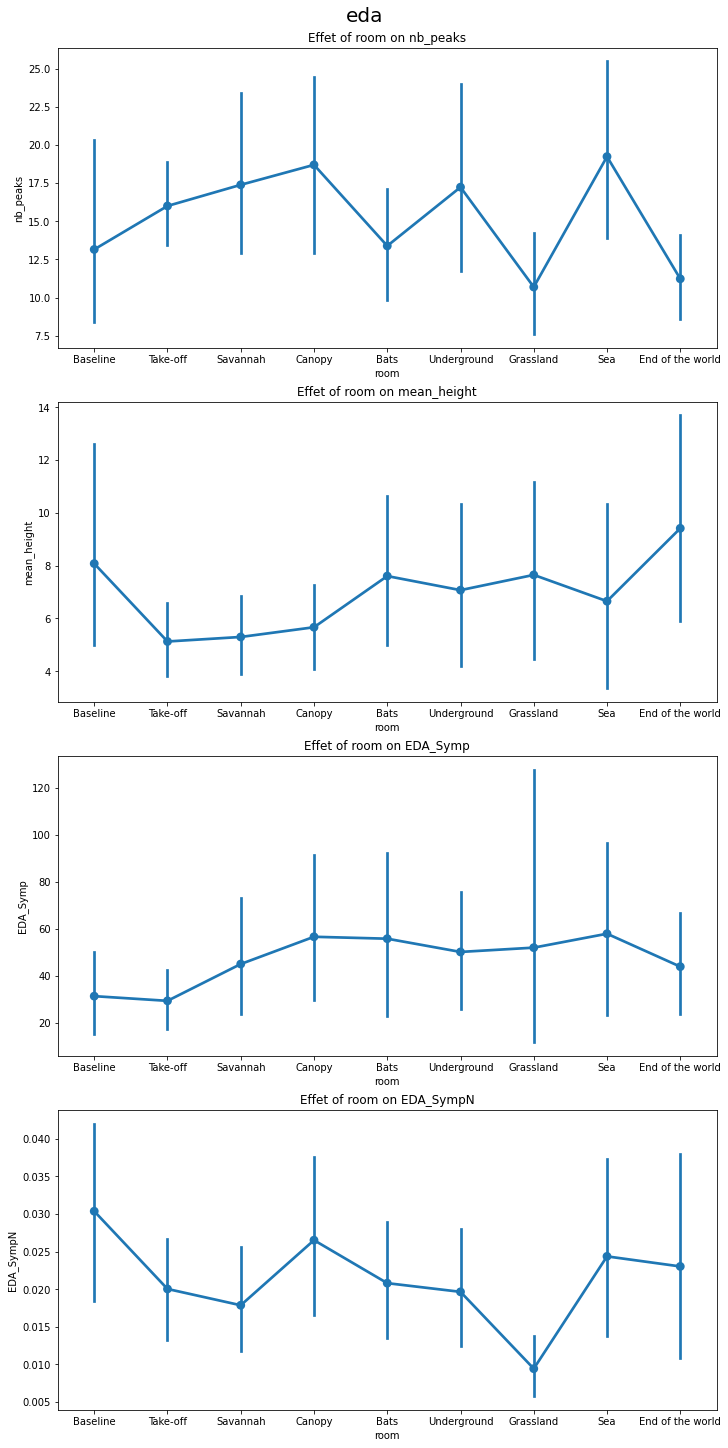

In [14]:
for biosig in ['eeg','ecg','eda']:
    df = load(biosig)
    loop_outcomes = outcomes[biosig]
    fig, axs = plt.subplots(nrows = len(loop_outcomes), figsize = (10,20), constrained_layout = True)
    fig.suptitle(f'{biosig}', fontsize = 20)
    for row, outcome in enumerate(loop_outcomes):
        ax = axs[row]
        sns.pointplot(data=df , x=predictor , y = outcome, ax = ax)
        ax.set_title(f'Effet of {predictor} on {outcome}')
    if savefig:
        plt.savefig(f'../stats/figs/boxplot_{biosig}')
    plt.show()

- Globalement les participants semblent quitter la visite dans le même état physiologique que dans lequel ils sont rentrés, notamment car end of the world rattrape les effets de savannah & canopy & underground qui ont stressés nos participants

In [15]:
def load_visit_effect(biosig, filter_quality=True):
    df = pd.read_excel(f'../metrics/{biosig}_metrics_visit.xlsx').drop(columns = 'Unnamed: 0')
    if filter_quality:
        if biosig == 'ecg':
            df_return = df[df['quality'] == 2]
        else:
            df_return = df[df['quality'] >= 1]
    else:
        df_return = df
    return df_return.dropna(axis = 'columns')

Un-successfull transformation
Successfull transformation
Un-successfull transformation
Successfull transformation
Successfull transformation
Successfull transformation
Successfull transformation
Successfull transformation
Un-successfull transformation
Un-successfull transformation
Un-successfull transformation
Successfull transformation
Successfull transformation


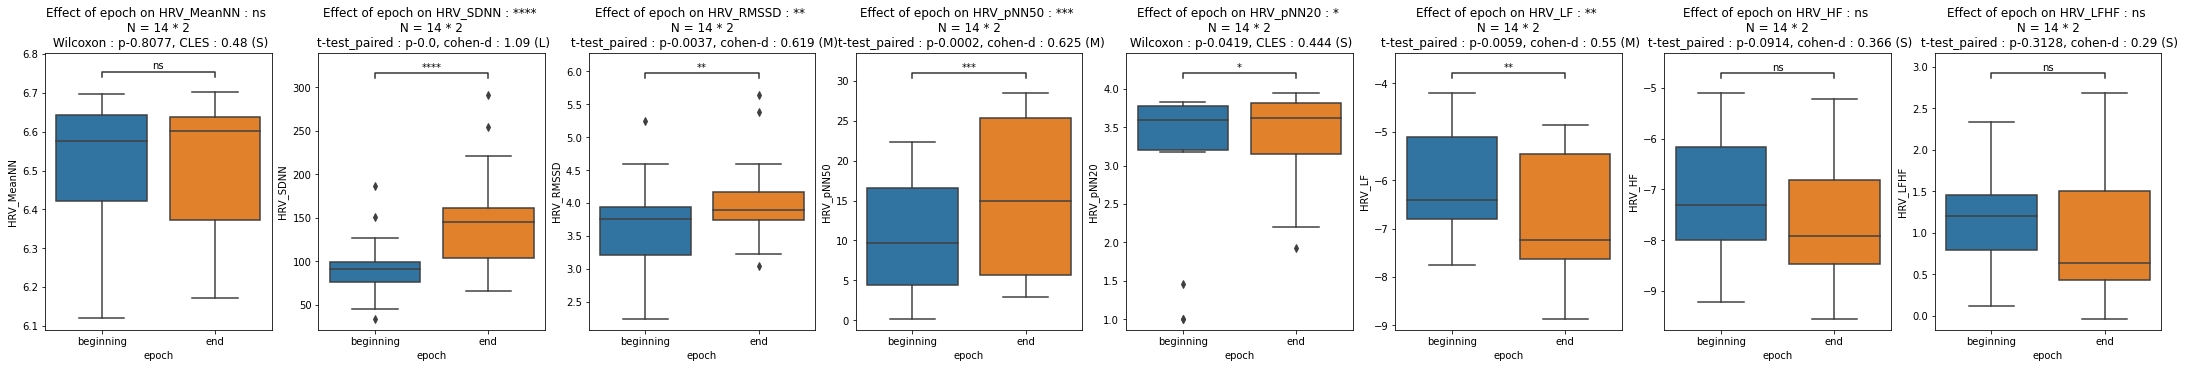

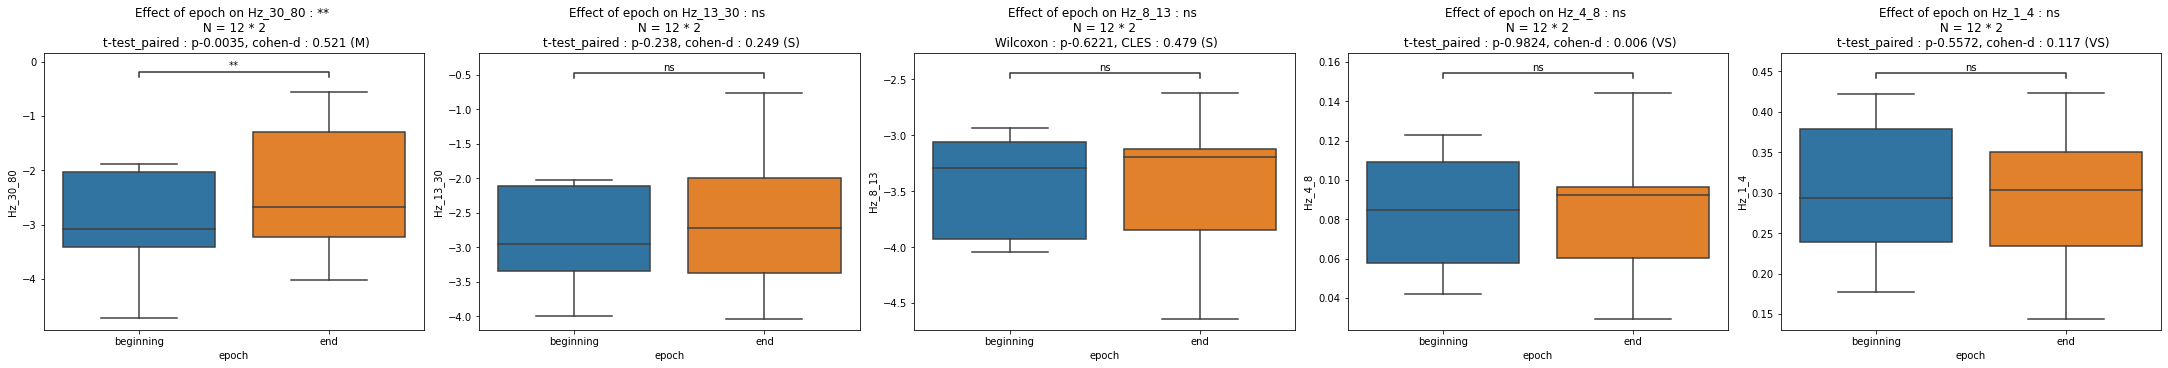

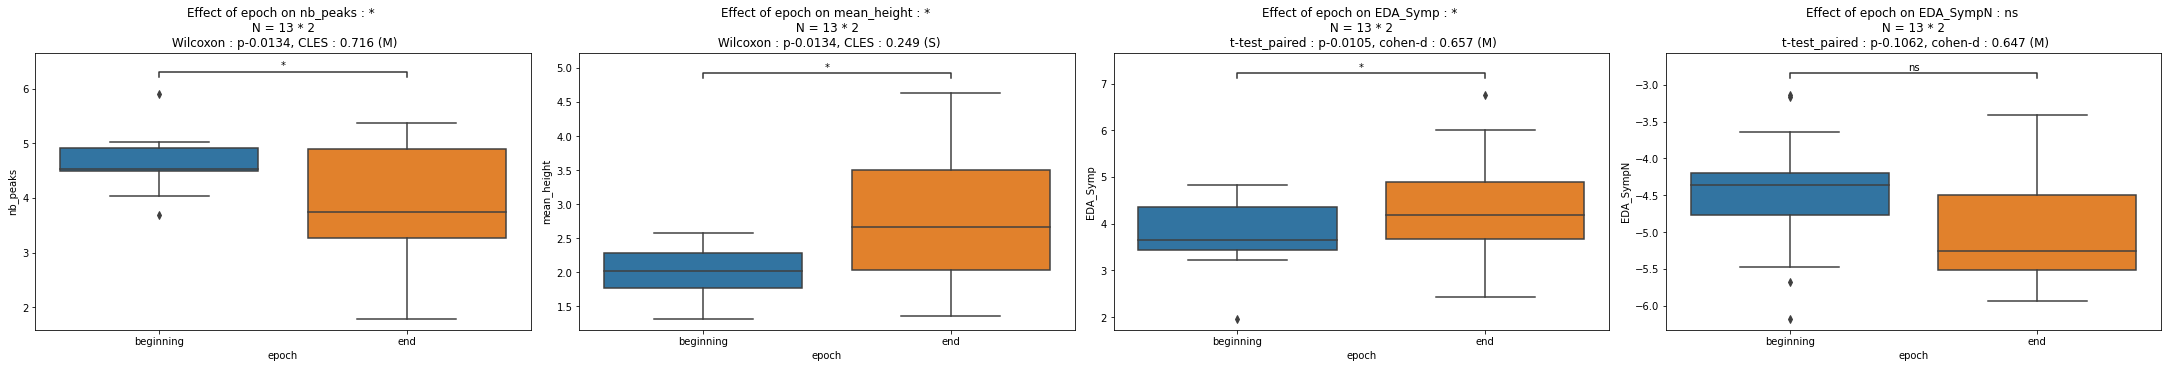

In [16]:
for biosig in ['ecg','eeg','eda']:
    fig, axs = plt.subplots(ncols = len(outcomes[biosig]), figsize = (30,5), constrained_layout = True)
    for col, outcome in enumerate(outcomes[biosig]):
        ax = axs[col]
        gh.auto_stats(df=load_visit_effect(biosig), predictor = 'epoch' , outcome = outcome, design = 'within', ax=ax)

Sujets + relaxés en fin qu'en début (15 min window) car + HRV (+ SDNN & pNN50 & RMSSD) en fin qu'en début et - EDA peaks en fin qu'en début

In [17]:
load_visit_effect('ecg').groupby('epoch').median()

,quality,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_pNN50,HRV_pNN20,HRV_LF,HRV_HF,HRV_LFHF
epoch,,,,,,,,,
beginning,2.0,718.319489,90.83198,42.621679,9.655253,36.491929,0.001670,0.000666,3.333489
end,2.0,735.656301,144.92650,49.048235,14.966210,37.345072,0.000718,0.000382,1.887003


Successfull transformation


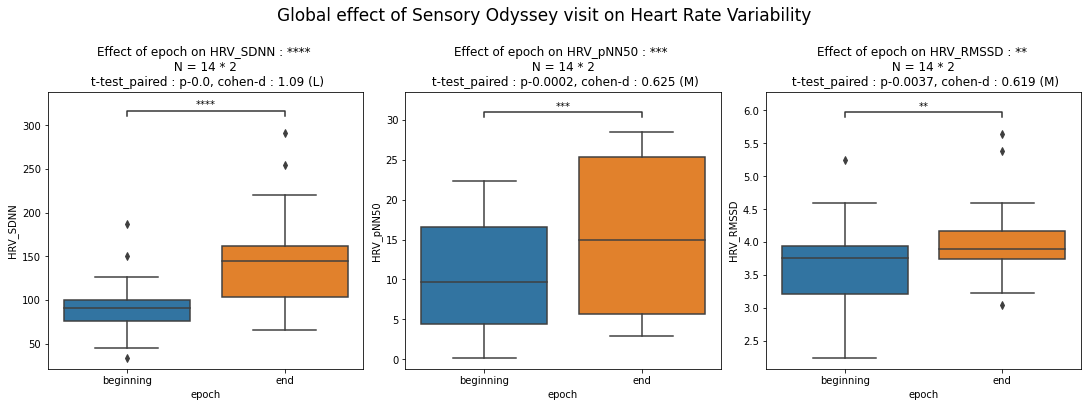

In [18]:
fig , axs = plt.subplots(ncols = 3, figsize = (15,5) , constrained_layout = True)
fig.suptitle('Global effect of Sensory Odyssey visit on Heart Rate Variability', fontsize = 17, y = 1.1)
for col, metric in enumerate(['HRV_SDNN','HRV_pNN50','HRV_RMSSD']):
    ax = axs[col]
    gh.auto_stats(df=load_visit_effect('ecg'), predictor = 'epoch' , outcome = metric, design = 'within', ax=ax, transform = True)

if savefig:
    plt.savefig('../figures/hrv_stats', bbox_inches = 'tight')

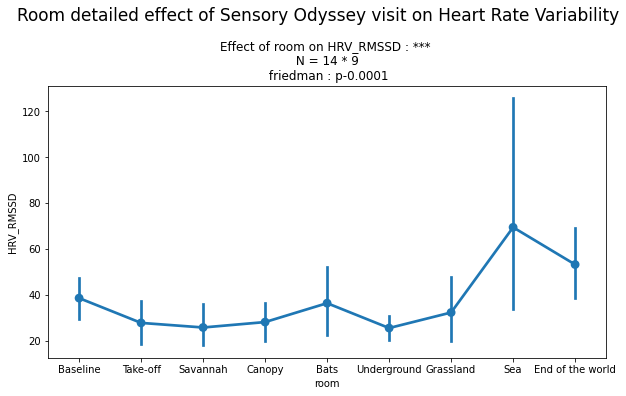

In [19]:
title = gh.auto_stats(df=ecg_metrics, predictor = 'room', outcome = 'HRV_RMSSD', subject = 'participant', transform = False).get_title()
plt.close()

fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Room detailed effect of Sensory Odyssey visit on Heart Rate Variability', fontsize = 17, y = 1.1)
sns.pointplot(data=ecg_metrics, x='room',y='HRV_RMSSD', ax=ax)
ax.set_title(title)
if savefig:
    plt.savefig('../figures/room_hrv_stats', bbox_inches = 'tight')